## Importing Libraries

In [3]:
import numpy as np
import os
from glob import glob
import cv2
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, precision_score,recall_score, confusion_matrix,\
                            classification_report, accuracy_score, f1_score

## Loading the images

In [4]:
main_dir = 'C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')

# Directory with our Train pictures of 3 Classes
train_covid = os.path.join(train_dir, 'Covid')
train_normal = os.path.join(train_dir, 'Normal')
train_pneumonia= os.path.join(train_dir, 'Viral Pneumonia')




# Directory with our Test pictures of 3 Classes
test_covid = os.path.join(test_dir, 'Covid')
test_pneumonia= os.path.join(test_dir, 'Viral Pneumonia')
test_normal = os.path.join(test_dir, 'Normal')

                              
                              
# reading image names of training data                              
train_covid_images = os.listdir(train_covid)
train_normal_images = os.listdir(train_normal)
train_pneumonia_images = os.listdir(train_pneumonia)  

# reading image names of testing data     
test_covid_images = os.listdir(test_covid)
test_normal_images = os.listdir(test_normal)
test_pneumonia_images = os.listdir(test_pneumonia) 



print ('Training Images :{} '.format(len(train_covid_images)+len(train_normal_images)+len(train_pneumonia_images)))
print ('Testing Images  :{} '.format(len(test_covid_images)+len(test_normal_images)+len(test_pneumonia_images)))

Training Images :8034 
Testing Images  :1391 


In [5]:
images=[]
labels=[]

for i in os.listdir(train_dir):
    
    clas =os.path.join(train_dir,i)
    
    for image_path in glob(os.path.join(clas, "*.png")):
        
        images.append(cv2.resize(cv2.imread(image_path),(224,224))/255)
        
        if image_path.split('/')[5].split('\\')[2]=='Covid':
            labels.append('Covid')
        elif image_path.split('/')[5].split('\\')[2]=='Viral Pneumonia':
            labels.append('Viral Pneumonia')
        elif image_path.split('/')[5].split('\\')[2]=='Normal':
            labels.append('Normal')
             


In [6]:
print("The no of Training Examle             : {}".format(len(images)))
print("The no of lables of Training Examples : {}".format(len(labels)))
print("The shape of each Image               : {}".format(images[0].shape))
print("No of Covid Xrays                     : {}".format(len(train_covid_images)))
#print("No of Lung_Opacity Xrays              : {}".format(len(train_lung_opacity_images)))
print("No of Normal Xrays                    : {}".format(len(train_normal_images)))
print("No of Viral Pneumonia Xrays           : {}".format(len(train_pneumonia_images)))
print("No of Covid Xray Labels               : {}".format(labels.count('Covid')))
#print("No of Lung_Opacity Xray Labels        : {}".format(labels.count('Lung_Opacity')))
print("No of Normal Xray Labels              : {}".format(labels.count('Normal')))
print("No of Viral Pneumonia Xray Labels     : {}".format(labels.count('Viral Pneumonia')))

The no of Training Examle             : 8034
The no of lables of Training Examples : 8034
The shape of each Image               : (224, 224, 3)
No of Covid Xrays                     : 1989
No of Normal Xrays                    : 4992
No of Viral Pneumonia Xrays           : 1053
No of Covid Xray Labels               : 1989
No of Normal Xray Labels              : 4992
No of Viral Pneumonia Xray Labels     : 1053


In [7]:
print(labels.index('Covid'))
#print(labels.index('Lung_Opacity'))
print(labels.index('Normal'))
print(labels.index('Viral Pneumonia'))

0
1989
6981


## Unseen Data (For Testing Time)

In [8]:
test_images=[]
test_labels=[]

for i in os.listdir(test_dir):

    clas =os.path.join(test_dir,i)
    
    for image_path in glob(os.path.join(clas, "*.png")):
        
        test_images.append(cv2.resize(cv2.imread(image_path),(224,224))/255)
        
        if image_path.split('/')[5].split('\\')[2]=='Covid':
            test_labels.append('Covid')
        elif image_path.split('/')[5].split('\\')[2]=='Viral Pneumonia':
            test_labels.append('Viral Pneumonia')
        elif image_path.split('/')[5].split('\\')[2]=='Normal':
            test_labels.append('Normal')
        

In [9]:
print("The no of Testing Examle             : {}".format(len(test_images)))
print("The no of lables of Training Examples :{}".format(len(test_labels)))
print("The shape of each Image               : {}".format(test_images[0].shape))
print("No of Covid Xrays                     : {}".format(len(test_covid_images)))
#print("No of Lung_Opacity Xrays              : {}".format(len(test_lung_opacity_images)))
print("No of Normal Xrays                    : {}".format(len(test_normal_images)))
print("No of Viral Pneumonia Xrays           : {}".format(len(test_pneumonia_images)))
print("No of Covid Xray Labels               : {}".format(test_labels.count('Covid')))
#print("No of Lung_Opacity Xray Labels        : {}".format(test_labels.count('Lung_Opacity')))
print("No of Normal Xray Labels              : {}".format(test_labels.count('Normal')))
print("No of Viral Pneumonia Xray Labels     : {}".format(test_labels.count('Viral Pneumonia')))

The no of Testing Examle             : 1391
The no of lables of Training Examples :1391
The shape of each Image               : (224, 224, 3)
No of Covid Xrays                     : 195
No of Normal Xrays                    : 988
No of Viral Pneumonia Xrays           : 208
No of Covid Xray Labels               : 195
No of Normal Xray Labels              : 988
No of Viral Pneumonia Xray Labels     : 208


In [10]:
print(test_labels.index('Covid'))
#print(test_labels.index('Lung_Opacity'))
print(test_labels.index('Normal'))
print(test_labels.index('Viral Pneumonia'))

0
195
1183


# Onehot encoding for Trainingdata

In [11]:

images = np.array(images,dtype='float32')



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)



onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
labels=onehot_encoded



print(type(images))
print(type(labels))
print("*"*30)
print(images.shape)
print(labels.shape)
print("*"*30)

[0 0 0 ... 2 2 2]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
******************************
(8034, 224, 224, 3)
(8034, 3)
******************************


# Onehot encoding for Testingdata

In [12]:
test_images = np.array(test_images,dtype='float32')



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_labels)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
test_labels=onehot_encoded



print(type(test_images))
print(type(test_labels))

[0 0 0 ... 2 2 2]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
print(test_images.shape)
print(test_labels.shape)

(1391, 224, 224, 3)
(1391, 3)


In [14]:
X_train, X_val= train_test_split(images, test_size=0.2, random_state=42)
y_train, y_val= train_test_split(labels, test_size=0.2, random_state=42)

print (X_train.shape)
print (y_train.shape)
print (X_val.shape)
print (y_val.shape)

(6427, 224, 224, 3)
(6427, 3)
(1607, 224, 224, 3)
(1607, 3)


### Sample Images

AxesImage(54,36;334.8x217.44)
[0. 1. 0.]


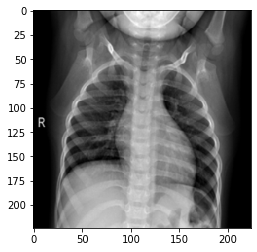

In [15]:
print(plt.imshow(X_train[0]))
print(y_train[0])

AxesImage(54,36;334.8x217.44)
[1. 0. 0.]


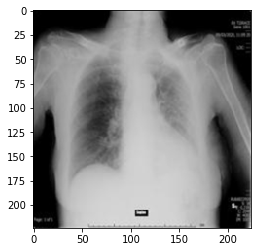

In [16]:
print(plt.imshow(X_train[6000]))
print(y_train[6000])

# Traing samples vs Validation Samples

In [17]:
c=(y_train[:,0] == 1).sum()
n=(y_train[:,1] == 1).sum()
p=(y_train[:,2] == 1).sum()

print('Covid samples in training             : {}'.format(c)) #covid
print('Normal samples in training            : {}'.format(n)) # Normal
print('Viral Pneumonia samples in training   : {}'.format(p)) # Viral Pneumonia

C=(y_val[:,0] == 1).sum()
N=(y_val[:,1] == 1).sum()
P=(y_val[:,2] == 1).sum()


print("*"*45)
print('Covid samples in validation            : {}'.format(C)) #covid
print('Normal samples in validation           : {}'.format(N)) # Normal
print('Viral Pneumonia samples in validation  : {}'.format(P)) # Viral Pneumonia

Covid samples in training             : 1574
Normal samples in training            : 4008
Viral Pneumonia samples in training   : 845
*********************************************
Covid samples in validation            : 415
Normal samples in validation           : 984
Viral Pneumonia samples in validation  : 208


In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(6427, 224, 224, 3)
(6427, 3)
(1607, 224, 224, 3)
(1607, 3)


## Custom Model

In [21]:
import tensorflow as tf
 
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(224, 224, 3)),
    
    
    #Block1
    tf.keras.layers.Conv2D(64, (4, 4), activation='relu', padding='valid'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    
    # Block 2
    tf.keras.layers.Conv2D(128, (4, 4), activation='relu', padding='valid'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),


    # Block 3
   
    tf.keras.layers.Conv2D(256, (4, 4), activation='relu', padding='valid'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    



    tf.keras.layers.Flatten(), 
    
    #fully connected layers
    
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(64, activation='relu'), 
    
    tf.keras.layers.Dense(32, activation='relu'), 
    
    tf.keras.layers.Dense(3, activation='softmax')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 219, 219, 64)      8256      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 217, 217, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 108, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 108, 108, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 105, 105, 128)     131200    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 103, 103, 128)     1

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [23]:
history=model.fit(X_train,y_train,batch_size=100,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
65/65 [==============================] - 3037s 47s/step - loss: 0.6267 - accuracy: 0.7310 - val_loss: 0.9958 - val_accuracy: 0.7704
Epoch 2/5
65/65 [==============================] - 3143s 48s/step - loss: 0.3977 - accuracy: 0.8380 - val_loss: 0.9335 - val_accuracy: 0.8245
Epoch 3/5
65/65 [==============================] - 3757s 58s/step - loss: 0.3241 - accuracy: 0.8724 - val_loss: 0.7677 - val_accuracy: 0.8637
Epoch 4/5
65/65 [==============================] - 3456s 53s/step - loss: 0.2590 - accuracy: 0.9009 - val_loss: 0.8460 - val_accuracy: 0.8164
Epoch 5/5
65/65 [==============================] - 3423s 53s/step - loss: 0.2178 - accuracy: 0.9171 - val_loss: 0.6044 - val_accuracy: 0.8587


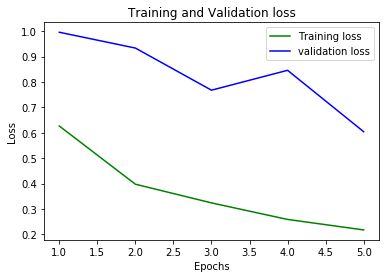

In [25]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

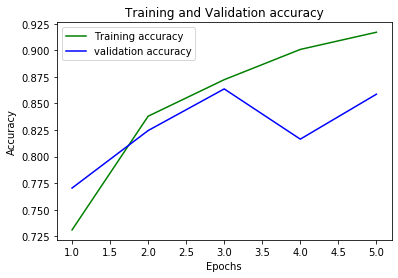

In [26]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
print(test_images.shape)
print(test_labels.shape)

(1391, 224, 224, 3)
(1391, 3)


In [28]:
y_hat=model.predict(test_images)
test_labels=np.argmax(test_labels,axis=1)
y_hat=np.argmax(y_hat,axis=1)
print(test_labels.shape)
print(y_hat.shape)
print(accuracy_score(test_labels,y_hat))

(1391,)
(1391,)
0.8346513299784328


## InceptionV3 

In [37]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dense(64  ,activation='relu')(x)
x = Dense(32  ,activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)


model1 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model1.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model1.fit(X_train,y_train,batch_size=100,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
65/65 [==============================] - 466s 7s/step - loss: 0.4924 - accuracy: 0.7823 - val_loss: 0.3246 - val_accuracy: 0.8762
Epoch 2/5
65/65 [==============================] - 500s 8s/step - loss: 0.2821 - accuracy: 0.8917 - val_loss: 0.2663 - val_accuracy: 0.8992
Epoch 3/5
65/65 [==============================] - 434s 7s/step - loss: 0.2458 - accuracy: 0.9091 - val_loss: 0.3015 - val_accuracy: 0.8749
Epoch 4/5
65/65 [==============================] - 426s 7s/step - loss: 0.2170 - accuracy: 0.9182 - val_loss: 0.2727 - val_accuracy: 0.9091
Epoch 5/5
65/65 [==============================] - 437s 7s/step - loss: 0.2080 - accuracy: 0.9222 - val_loss: 0.2661 - val_accuracy: 0.9060


In [56]:
y_hat1=model1.predict(test_images)
y_hat1=np.argmax(y_hat1,axis=1)
test_labels1=np.argmax(test_labels,axis=1)
print(test_labels.shape)
print(y_hat.shape)
print(accuracy_score(test_labels1,y_hat1))

(1391, 3)
(1391, 3)
0.8785046728971962


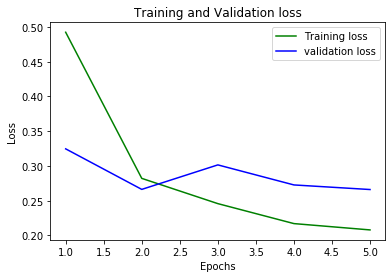

In [60]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

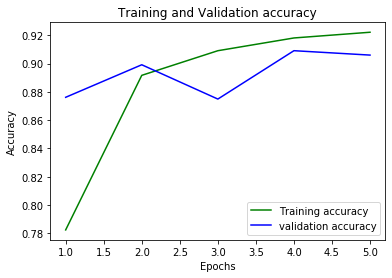

In [59]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# DenseNet121

In [23]:
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)


model2 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model2.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history2=model2.fit(X_train,y_train,batch_size=100,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
65/65 [==============================] - 820s 13s/step - loss: 0.4366 - accuracy: 0.8304 - val_loss: 0.2475 - val_accuracy: 0.9104
Epoch 2/5
65/65 [==============================] - 830s 13s/step - loss: 0.2263 - accuracy: 0.9146 - val_loss: 0.2132 - val_accuracy: 0.9235
Epoch 3/5
65/65 [==============================] - 849s 13s/step - loss: 0.1923 - accuracy: 0.9270 - val_loss: 0.1981 - val_accuracy: 0.9297
Epoch 4/5
65/65 [==============================] - 842s 13s/step - loss: 0.1719 - accuracy: 0.9357 - val_loss: 0.1741 - val_accuracy: 0.9340
Epoch 5/5
65/65 [==============================] - 831s 13s/step - loss: 0.1518 - accuracy: 0.9445 - val_loss: 0.2029 - val_accuracy: 0.9241


In [34]:
os.getcwd()
model2.save("C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray\assets


In [36]:
from tensorflow import keras
model = keras.models.load_model('C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray')

In [53]:
i=cv2.resize(cv2.imread("C:/Users/sivan/Desktop/ML Projects/Covid-19 Using Chestxray/Viral Pneumonia-1070.png"),(224,224))/255
i=i.reshape(1,224,224,3)
res=model.predict(i)
res

array([[0.01606501, 0.05654024, 0.92739475]], dtype=float32)

In [47]:
y_hat2=model.predict(test_images)
y_hat2=np.argmax(y_hat2,axis=1)
test_labels2=np.argmax(test_labels,axis=1)
print(test_labels2.shape)
print(y_hat2.shape)
print(accuracy_score(test_labels2,y_hat2))

(1391,)
(1391,)
0.8713156002875629


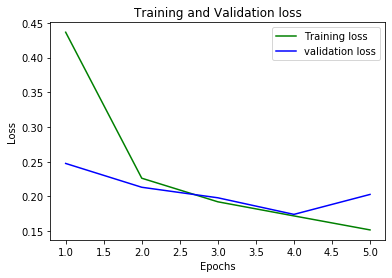

In [26]:
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

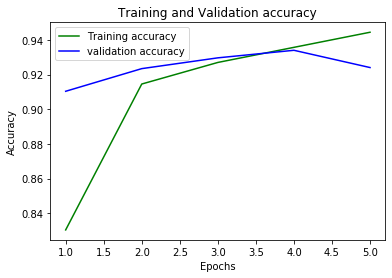

In [27]:
loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# VGG-16

In [63]:
from tensorflow.keras.applications.vgg16 import VGG16


base_model =VGG16(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)


model3 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model3.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(X_train,y_train,batch_size=100,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
65/65 [==============================] - 3816s 59s/step - loss: 0.6892 - accuracy: 0.7008 - val_loss: 0.5180 - val_accuracy: 0.7928
Epoch 2/5
65/65 [==============================] - 3724s 57s/step - loss: 0.4664 - accuracy: 0.8287 - val_loss: 0.4002 - val_accuracy: 0.8457
Epoch 3/5
65/65 [==============================] - 3702s 57s/step - loss: 0.3806 - accuracy: 0.8618 - val_loss: 0.3405 - val_accuracy: 0.8843
Epoch 4/5
65/65 [==============================] - 3617s 56s/step - loss: 0.3246 - accuracy: 0.8825 - val_loss: 0.2955 - val_accuracy: 0.8998
Epoch 5/5
65/65 [==============================] - 3645s 56s/step - loss: 0.2860 - accuracy: 0.8972 - val_loss: 0.2668 - val_accuracy: 0.9147


In [65]:
y_hat3=model3.predict(test_images)
y_hat3=np.argmax(y_hat3,axis=1)
test_labels3=np.argmax(test_labels,axis=1)
print(test_labels3.shape)
print(y_hat3.shape)
print(accuracy_score(test_labels3,y_hat3))

(1391,)
(1391,)
0.8626887131560029


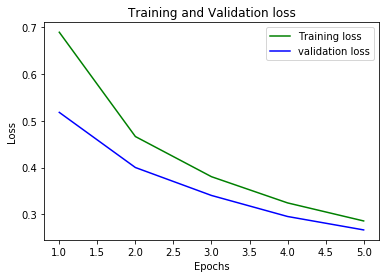

In [68]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

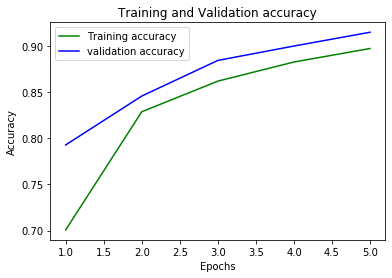

In [69]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# DenseNet121 (10 epochs)

In [70]:

base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)


model4 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model4.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model4.fit(X_train,y_train,batch_size=100,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
65/65 [==============================] - 894s 14s/step - loss: 0.3939 - accuracy: 0.8415 - val_loss: 0.2706 - val_accuracy: 0.9004
Epoch 2/10
65/65 [==============================] - 947s 15s/step - loss: 0.2126 - accuracy: 0.9213 - val_loss: 0.2374 - val_accuracy: 0.9104
Epoch 3/10
65/65 [==============================] - 956s 15s/step - loss: 0.1880 - accuracy: 0.9300 - val_loss: 0.1769 - val_accuracy: 0.9353
Epoch 4/10
65/65 [==============================] - 1010s 16s/step - loss: 0.1644 - accuracy: 0.9421 - val_loss: 0.1712 - val_accuracy: 0.9353
Epoch 5/10
65/65 [==============================] - 1074s 17s/step - loss: 0.1476 - accuracy: 0.9468 - val_loss: 0.1593 - val_accuracy: 0.9390
Epoch 6/10
65/65 [==============================] - 1085s 17s/step - loss: 0.1291 - accuracy: 0.9519 - val_loss: 0.1526 - val_accuracy: 0.9421
Epoch 7/10
65/65 [==============================] - 987s 15s/step - loss: 0.1251 - accuracy: 0.9560 - val_loss: 0.2119 - val_accuracy: 0.9203
Epo

In [ ]:
y_hat4=model4.predict(test_images)
y_hat4=np.argmax(y_hat4,axis=1)
test_labels4=np.argmax(test_labels,axis=1)
print(test_labels4.shape)
print(y_hat4.shape)
print(accuracy_score(test_labels4,y_hat4))

# VGG-16 (10 Epochs)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16


base_model =VGG16(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)


model5 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model5.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
history=model5.fit(X_train,y_train,batch_size=100,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
65/65 [==============================] - 2894s 45s/step - loss: 0.7018 - accuracy: 0.7005 - val_loss: 0.5394 - val_accuracy: 0.7592
Epoch 2/10
65/65 [==============================] - 3118s 48s/step - loss: 0.4817 - accuracy: 0.8173 - val_loss: 0.4174 - val_accuracy: 0.8594
Epoch 3/10
65/65 [==============================] - 3058s 47s/step - loss: 0.3876 - accuracy: 0.8584 - val_loss: 0.3448 - val_accuracy: 0.8880
Epoch 4/10
65/65 [==============================] - 3103s 48s/step - loss: 0.3366 - accuracy: 0.8760 - val_loss: 0.3082 - val_accuracy: 0.8892
Epoch 5/10
65/65 [==============================] - 3107s 48s/step - loss: 0.2971 - accuracy: 0.8928 - val_loss: 0.2749 - val_accuracy: 0.8992
Epoch 6/10
65/65 [==============================] - 3093s 48s/step - loss: 0.2667 - accuracy: 0.9035 - val_loss: 0.2556 - val_accuracy: 0.9228
Epoch 7/10
65/65 [==============================] - 3239s 50s/step - loss: 0.2496 - accuracy: 0.9080 - val_loss: 0.2359 - val_accuracy: 0.9185